<a href="https://colab.research.google.com/github/anipatel22/MixingCalcs/blob/main/Ru_MxingCalcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT PACKAGES** 
---

In [ ]:
from data_processor import *

In [ ]:
# !git clone

In [ ]:
import sys, io, requests
import math

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
from matplotlib import rcParams

**DATA PROCESSING** 
---
for Ru Isotopes [99, 100, 101, 102, 104]


Solar

In [ ]:
sol_raw = [0.100, 0.034, 0.230, 0.228, 0.308, 0.57, 0.336] #Abundances from lodders 2020

sol_iso_ratio = get_iso_ratio(sol_raw, .308)
sol_mfrac = get_mfrac(sol_iso_ratio)
sol_mfrac.pop(0), sol_mfrac.pop(0)
sol_iso_ratio.pop(0), sol_iso_ratio.pop(0)
print(sol_mfrac)

[0.12735326688815063, 0.12624584717607976, 0.17054263565891473, 0.3156146179401993, 0.186046511627907]


Terrestrial (N1)

In [ ]:
AAS_A = [0.322032, 0.108982, 0.7450754,	0.737053, 1,	1.853321,	1.097781] #terrestrial standard in isotopic ratio (over Ru 101)
AAS_B =[0.321969, 0.108974, 0.7450754,	0.737053, 1,	1.853290,	1.097599]
AAS_C = [0.322379, 0.109013, 0.7450754,	0.736944, 1,	1.852226,	1.095726]

AAS_mfrac_A = get_mfrac(AAS_A)
AAS_mfrac_B = get_mfrac(AAS_B)
AAS_mfrac_C = get_mfrac(AAS_C)
AAS_mfrac_A.pop(0), AAS_mfrac_A.pop(0), AAS_mfrac_B.pop(0), AAS_mfrac_B.pop(0), AAS_mfrac_C.pop(0), AAS_mfrac_C.pop(0)
print()

S-Process (N2)

In [ ]:
PSG_s_raw = [-628.4444444, 0, -687.8888889, -411.8333333, -824.8333333] # average s-process in delta notation taken from presolar grain database

PSG_s_iso_ratio = to_iso_ratio(PSG_s_raw, sol_iso_ratio, 'delta')
print(PSG_s_iso_ratio)
PSG_s_mfrac = get_mfrac(PSG_s_iso_ratio)
print(PSG_s_mfrac)

calc_s_raw = [0.0669, 0.223, 0.0483, 0.253, 0.00952] #Abundances from Arlandini
calc_s_ratio = get_iso_ratio(calc_s_raw, .223)
print(calc_s_ratio)

calc_s_mfrac = get_mfrac(calc_s_ratio)
print(calc_s_mfrac)

[0.2774603174935066, 0.7402597402597403, 0.3121111111, 1.0884902598019481, 0.19109090912727267]
[0.10633057622824689, 0.28368829622719893, 0.11960973226839207, 0.4171399989343844, 0.07323139634177772]
[0.3, 1.0, 0.21659192825112109, 1.1345291479820627, 0.04269058295964126]
[0.11136636036755891, 0.3712212012251964, 0.08040351578106272, 0.42116127313889995, 0.01584764948728193]


Istaq geniss complex (IGC) (N_obs)


In [ ]:
IGC_iso_ratio_A = [0.322033, 0.108984, 0.745075,	0.737062, 1,	1.853339,	1.097794]
IGC_iso_ratio_B = [0.321963, 0.108975, 0.745075,	0.737062,	1, 1.853309,	1.097607]
IGC_iso_ratio_C = [0.322374, 0.109013, 0.745075,	0.736962,	1, 1.852243,	1.095718]

IGC_mfrac_A = get_mfrac(IGC_iso_ratio_A)
IGC_mfrac_B = get_mfrac(IGC_iso_ratio_B)
IGC_mfrac_C = get_mfrac(IGC_iso_ratio_C)
IGC_mfrac_A.pop(0), IGC_mfrac_A.pop(0), IGC_mfrac_B.pop(0), IGC_mfrac_B.pop(0), IGC_mfrac_C.pop(0), IGC_mfrac_C.pop(0)
print()


In [ ]:
X_obsA = IGC_mfrac_A                                                                        
X1A = AAS_mfrac_A

X_obsB = IGC_mfrac_B                                                                        
X1B = AAS_mfrac_B 

X_obsC = IGC_mfrac_C                                                                        
X1C = AAS_mfrac_C

X2 = PSG_s_mfrac
X2_calc = calc_s_mfrac    

Mr = [98.905930, 99.904211, 100.905573, 101.904340, 103.90543] 
AN = 6.0221409E23
N1A = []
N1B = []
N1C = []
N2 = []
N2_calc = []
N_obsA = []
N_obsB = []
N_obsC = []

for i in range(len(X1A)):
  N1A.append((X1A[i]/Mr[i])*AN)
for i in range(len(X1B)):
  N1B.append((X1B[i]/Mr[i])*AN)
for i in range(len(X1C)):
  N1C.append((X1C[i]/Mr[i])*AN)

for i in range(len(X2)):
  N2.append((X2[i]/Mr[i])*AN)

for i in range(len(X2_calc)):
  N2_calc.append((X2_calc[i]/Mr[i])*AN)

for i in range(len(X_obsA)):
  N_obsA.append((X_obsA[i]/Mr[i])*AN)
for i in range(len(X_obsB)):
  N_obsB.append((X_obsB[i]/Mr[i])*AN)
for i in range(len(X_obsA)):
  N_obsC.append((X_obsC[i]/Mr[i])*AN)

print(N1A)
print(N2)
print(N2_calc)
print(N_obsA)

[7.736005046594015e+20, 7.576240886840333e+20, 1.0177091935474883e+21, 1.8676556968632753e+21, 1.084966469335999e+21]
[6.474209504169198e+20, 1.7100489303310053e+21, 7.138422976216919e+20, 2.4651313659542986e+21, 4.2443382128723205e+20]
[6.780826120876833e+20, 2.237689839565807e+21, 4.79855855819711e+20, 2.488895495977738e+21, 9.184965419634426e+19]
[7.73594469674422e+20, 7.576278361896786e+20, 1.0177018005921903e+21, 1.8676602687239383e+21, 1.084971435959076e+21]


**MIXING CALCULATIONS**
---

Defenition of variables:
*   'isotope' is a list storing strigs of the isotopes of interest.
*   'N_obs' is a list with observed mass fraction values that we are trying to reproduce and match with the calculations.
*   'N1' is a list with mass fraction values of the the first reservoir we are mixing with 'N2'. (Modern Mantle mass fractions)
*   'N2' is a list with mass fraction values of the secondary constituent reservoir we are mixing with 'N1'. (Solar System s-process mass fractions)
*   'N_calc' is a list to store the calculated mass fractions. 
*   F is the 'mixing factor' which we are testing. Ex: If F = 0.05, then there is 5% excess of N2 material added to N1 which produces the values in N_calc.
*   'Ndiff' the mass fraction difference between calculated and observed. This helps determine which F is best fit.





In [ ]:
isotope = ["\u03bc$^{99}$Ru", "\u03bc$^{100}$Ru", "\u03bc$^{101}$Ru", "\u03bc$^{102}$Ru", "\u03bc$^{104}$Ru"]     
                                                                                                                                                                      

In [ ]:
F = 0.000017

N_calcA = mix_mfrac(N1A, N2, F)
N_calcB = mix_mfrac(N1B, N2, F)
N_calcC = mix_mfrac(N1C, N2, F)

N_calc2A = mix_mfrac(N1A, N2_calc, F)
N_calc2B = mix_mfrac(N1B, N2_calc, F)
N_calc2C = mix_mfrac(N1C, N2_calc, F)

print(N_calcA)
print(N_calcB)
print(N_calcC)

# N_diffA = []
# for i in range(len(N_obsA)):
#   N_diffA.append(N_calcA[i] - N_obsA[i])

# N_diffB = []
# for i in range(len(N_obsA)):
#   N_diffB.append(N_calcB[i] - N_obsB[i])

N_diffC = []
for i in range(len(N_obsA)):
  N_diffC.append(N_calcC[i] - N_obsC[i])

# N_diff2A = []
# for i in range(len(N_obsA)):
#   N_diff2A.append(N_calc2A[i] - N_obsA[i])

# N_diff2B = []
# for i in range(len(N_obsA)):
#   N_diff2B.append(N_calc2B[i] - N_obsB[i])

N_diff2C = []
for i in range(len(N_obsA)):
  N_diff2C.append(N_calc2C[i] - N_obsC[i])

N_diffsq = [i**2 for i in N_diffC]
N_diffsq2 = [i**2 for i in N_diff2C]

N_sum = sum(N_diffsq)
N_sum2 = sum(N_diffsq2)

print(N_sum)
print(N_sum2)

[7.735983596069793e+20, 7.576402799063414e+20, 1.0177040278102576e+21, 1.86766585394965e+21, 1.0849552402809822e+21]
[7.736358255503682e+20, 7.576769721021784e+20, 1.0177533160860562e+21, 1.8677250648975404e+21, 1.0848279047220543e+21]
[7.739785962538475e+20, 7.579005685501589e+20, 1.0182042476639299e+21, 1.8674798426921933e+21, 1.0834565426463851e+21]
3.9863666165695416e+30
1.4555734982969506e+32


In [ ]:
N1A_ratio = get_iso_ratio(N1A,N1A[2])
N1B_ratio = get_iso_ratio(N1B,N1B[2])
N1C_ratio = get_iso_ratio(N1C,N1C[2])

N_obsA_ratio = get_iso_ratio(N_obsA, N_obsA[2])
N_obsB_ratio = get_iso_ratio(N_obsB, N_obsB[2])
N_obsC_ratio = get_iso_ratio(N_obsC, N_obsC[2])

N_obsA_mu = to_scaled_ratio(N_obsA_ratio, N1A_ratio,'mu')
N_obsB_mu = to_scaled_ratio(N_obsB_ratio, N1B_ratio,'mu')
N_obsC_mu = to_scaled_ratio(N_obsC_ratio, N1C_ratio,'mu')

N_calcA_ratio = get_iso_ratio(N_calcA,N_calcA[2])
N_calcB_ratio = get_iso_ratio(N_calcB,N_calcB[2])
N_calcC_ratio = get_iso_ratio(N_calcC,N_calcC[2])

N_calcA_mu = to_scaled_ratio(N_calcA_ratio, N1A_ratio, 'mu')
N_calcB_mu = to_scaled_ratio(N_calcB_ratio, N1B_ratio, 'mu')
N_calcC_mu = to_scaled_ratio(N_calcC_ratio, N1C_ratio, 'mu')

N_calcA2_ratio = get_iso_ratio(N_calc2A,N_calc2A[2])
N_calcB2_ratio = get_iso_ratio(N_calc2B,N_calc2B[2])
N_calcC2_ratio = get_iso_ratio(N_calc2C,N_calc2C[2])

N_calcA2_mu = to_scaled_ratio(N_calcA2_ratio, N1A_ratio, 'mu')
N_calcB2_mu = to_scaled_ratio(N_calcB2_ratio, N1B_ratio, 'mu')
N_calcC2_mu = to_scaled_ratio(N_calcC2_ratio, N1C_ratio, 'mu')


In [ ]:
print(N_calcA_mu)
print(N_obsA_mu)
print(N_calcA2_mu)

[2.303043014295625, 26.447032332566067, 0.0, 10.514316219456532, -5.273858021515032]
[-0.536858417388153, 12.210790811817418, 0.0, 9.712294847918912, 11.842070504419766]
[6.88544051374862, 42.19533607185966, 0.0, 14.639255297099751, -6.576495345966826]


In [ ]:
error = [10, 12, 0, 16, 30]

**Plot (Atomic Abudnances in Mu)**
---

NameError: ignored

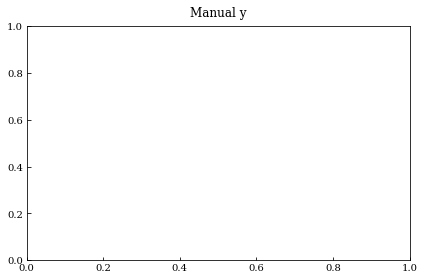

In [ ]:


fig = plt.figure()
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('Manual y', y=1.1, pad=-14)

plt.plot(isotope, N_obsA_mu, color = 'black', marker='o', label = 'Isua, Greenland')
# plt.plot(isotope, obs_mu_terr, color = 'brown', label = 'measured, avg')
plt.plot(isotope, N_calcA_mu, color = 'y', marker='o', label = 'Presolar Grain (Sic)')
plt.plot(isotope, N_calcA2_mu, color = 'blue', marker='o', label = 'Theoretical s-process')
plt.ylabel('\u03bc - deviation')
plt.title('Measured vs. Calcuated, Data Set A, ' + str(F))
plt.axhline(y = 0, color = 'black')
leg = plt.legend()
plt.savefig("DataA.png",format='png')
plt.show()

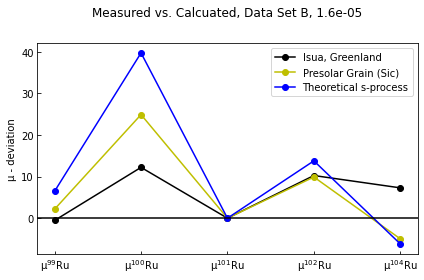

In [ ]:
fig = plt.figure()
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('Manual y', y=1.1, pad=-14)

plt.plot(isotope, N_obsB_mu, color = 'black', marker='o', label = 'Isua, Greenland')
# plt.plot(isotope, obs_mu_terr, color = 'brown', label = 'measured, avg')
plt.plot(isotope, N_calcB_mu, color = 'y', marker='o', label = 'Presolar Grain (Sic)')
plt.plot(isotope, N_calcB2_mu, color = 'blue', marker='o', label = 'Theoretical s-process')
plt.ylabel('\u03bc - deviation')
plt.title('Measured vs. Calcuated, Data Set B, ' + str(F))
plt.axhline(y = 0, color = 'black')
leg = plt.legend()
plt.savefig("DataB.pdf",format='pdf')
plt.show()

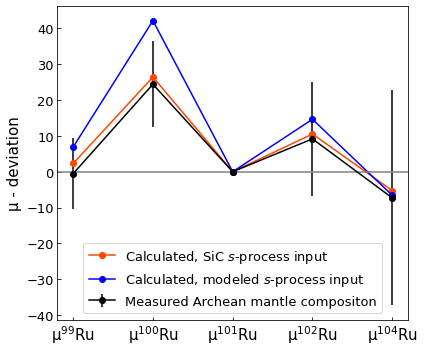

In [ ]:
# font = {'size : 40'}
# plt.rc('font', family='calibri')
plt.rcParams["figure.figsize"] = [6, 5]
plt.rcParams["figure.autolayout"] = True
# plt.rc('axes', titlesize=17) 
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize= 15)
plt.rc('ytick', labelsize= 13)
plt.rc('legend', fontsize= 13) 
fig = plt.figure()
# plt.style.use('classic')
ax = plt.axes() 
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
# ax.set_title('Manual y', y=1.05, pad=-14)

# plt.plot(isotope, N_obsC_mu, color = 'black', marker='o', label = 'Measured')
ax.errorbar(isotope, N_obsC_mu, yerr= error, fmt='o-', color = 'black', label = 'Measured Archean mantle compositon')
# plt.plot(isotope, obs_mu_terr, color = 'brown', label = 'measured, avg')
plt.plot(isotope, N_calcC_mu, color = 'orangered', marker='o', label = 'Calculated, SiC $s$-process input')
plt.plot(isotope, N_calcC2_mu, color = 'blue', marker='o', label = 'Calculated, modeled $s$-process input')
plt.ylabel('\u03bc - deviation')
# plt.title('Archean Mantle Ru and Mo Compositions')
plt.axhline(y = 0, color = 'gray')
leg = plt.legend(loc = 'lower center')
plt.savefig("DataC.pdf",format='pdf')
plt.show()